1\. Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом

2\.1\. Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл.

In [24]:
import re 
import spacy
nlp = spacy.load('en')

with open("Harry_Potter_and_the_Sorcerers_Stone.txt", "r+", encoding="utf-8") as f, open("result.txt", "w+", encoding="utf-8") as g:
    povar = f.read()
    h1 = re.sub('[\'!\"#$%&()*+,-./:;<=>?@[\]^_`{|}~„“«»†*—/\-"]', '', povar)
    h2 = h1.lower()
    h3 = nlp(h2)
    lemmas = [token.lemma_ for token in h3 if not token.is_stop]
    for lemm in lemmas:
        g.write("%s\n" % lemm)

2\.2\. Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.

In [178]:
import re
from operator import itemgetter
from collections import Counter
#from collections import defaultdict

frequency = {}
open_file = open('result.txt', 'r')
file_to_string = open_file.read()
words = re.findall(r'(\b[A-Za-z][a-z]{2,20}\b)', file_to_string)
 
os_x = {}
os_y = {}

for word in words:
    count = frequency.get(word,0)
    frequency[word] = count + 1

for key, value in reversed(sorted(frequency.items(), key = itemgetter(1))):
    if key in os_x:
        pass
    else:
        os_x[key] = 0

os_x = {key: rank for rank, key in enumerate(sorted(os_x, key=os_x.get), 1)}

for key, value in reversed(sorted(frequency.items(), key = itemgetter(1))):
    otn = value/len(words)
    os_y[key] = otn

{'harry': 1, 'say': 2, 'not': 3, 'ron': 4, 'look': 5, 'hagrid': 6, 'know': 7, 'hermione': 8, 'get': 9, 'would': 10, 'think': 11, 'like': 12, 'come': 13, 'tell': 14, 'have': 15, 'professor': 16, 'try': 17, 'snape': 18, 'dumbledore': 19, 'dudley': 20, 'want': 21, 'time': 22, 'find': 23, 'good': 24, 'malfoy': 25, 'right': 26, 'head': 27, 'uncle': 28, 'door': 29, 'see': 30, 'eye': 31, 'vernon': 32, 'turn': 33, 'neville': 34, 'take': 35, 'quirrell': 36, 'face': 37, 'hand': 38, 'potter': 39, 'hear': 40, 'dursley': 41, 'leave': 42, 'ask': 43, 'gryffindor': 44, 'mcgonagall': 45, 'way': 46, 'stand': 47, 'thing': 48, 'people': 49, 'boy': 50, 'room': 51, 'yeh': 52, 'sit': 53, 'point': 54, 'house': 55, 'year': 56, 'stone': 57, 'start': 58, 'hogwart': 59, 'feel': 60, 'will': 61, 'great': 62, 'ter': 63, 'open': 64, 'long': 65, 'stop': 66, 'wand': 67, 'pull': 68, 'wizard': 69, 'let': 70, 'little': 71, 'day': 72, 'suddenly': 73, 'walk': 74, 'give': 75, 'away': 76, 'school': 77, 'star': 78, 'letter': 7

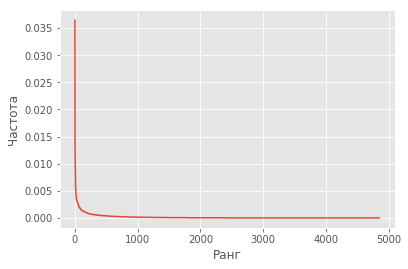

In [175]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(list(os_x.values()), list(os_y.values()))
plt.xlabel("Ранг")
plt.ylabel("Частота")
plt.show()

3\. Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

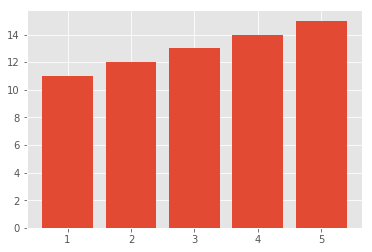

(range(0, 30), ['harry', 'say', 'not', 'ron', 'look', 'hagrid', 'know', 'hermione', 'get', 'would', 'think', 'like', 'come', 'tell', 'have', 'professor', 'try', 'snape', 'dumbledore', 'dudley', 'want', 'time', 'find', 'good', 'malfoy', 'right', 'head', 'uncle', 'door', 'see', 'eye', 'vernon', 'turn', 'neville', 'take', 'quirrell', 'face', 'hand', 'potter', 'hear', 'dursley', 'leave', 'ask', 'gryffindor', 'mcgonagall', 'way', 'stand', 'thing', 'people', 'boy', 'room', 'yeh', 'sit', 'point', 'house', 'year', 'stone', 'start', 'hogwart', 'feel', 'will', 'great', 'ter', 'open', 'long', 'stop', 'wand', 'pull', 'wizard', 'let', 'little', 'day', 'suddenly', 'walk', 'give', 'away', 'school', 'star', 'letter', 'book', 'aunt', 'voice', 'catch', 'bit', 'old', 'fall', 'owl', 'slytherin', 'foot', 'hold', 'weasley', 'inside', 'cloak', 'quidditch', 'wood', 'dark', 'second', 'yes', 'petunia', 'hat', 'watch', 'end', 'lot', 'large', 'remember', 'mind', 'wall', 'filch', 'table', 'talk', 'floor', 'run', '

In [192]:
X = [1, 2, 3, 4, 5]

objects = (list(os_x.keys()))

plt.bar(X, Y)
plt.show()

print(objects)